# Sarcasm Detector

## Get and Load Data

In [1]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.0-py3-none-any.whl size=14936 sha256=a7962e6dc4ad7c4d732c225a672153abac42e450b8c26bdc91ebb77679eb3f94
  Stored in directory: /tmp/pip-ephem-wheel-cache-qyy3ype7/wheels/8f/6a/47/3547c23c62b1eb97ed5d6afa8acc3a9dfe8104558edffee531
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
!gdown --id 1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz
To: /content/SarcasmDetect.json
100% 6.06M/6.06M [00:00<00:00, 48.4MB/s]


In [3]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.3 MB/s 
     |████████████████████████████████| 287 kB 31.5 MB/s 


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 36.8 MB/s 
     |████████████████████████████████| 596 kB 49.1 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!sudo pip3 install textsearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from bs4 import BeautifulSoup
import re,string,unicodedata
import contractions

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU,Activation,Input,SpatialDropout1D, Flatten, GlobalAveragePooling2D
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
from IPython.display import SVG
import tensorflow_hub as hub
import transformers

import gensim

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
df = pd.read_json('./SarcasmDetect.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Remove all records with no headline text

In [8]:
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [9]:
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [10]:
# Deleting article_link column because it's not useful
#df = df[['headline','is_sarcastic']]
#another way to do it:
del df['article_link'] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

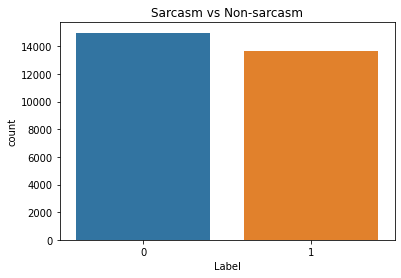

In [11]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


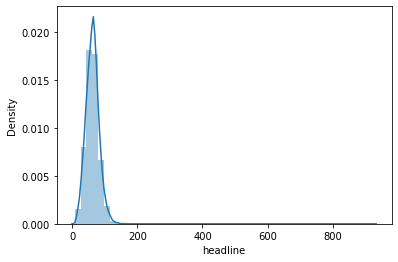

In [12]:
sns.distplot(df.headline.str.len())

In [13]:
#dataset is balanced

In [25]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
#data cleaning
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = text.lower()
    text = remove_accented_chars(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text = contractions.fix(text)
    # lower case and remove special characters\whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text, flags=re.I|re.A)
    text = re.sub(' +', ' ', text)
    text = text.strip()  
    return text

#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

In [29]:
headline = df['headline'].values
y = df['is_sarcastic'].values

X_train, X_test, y_train, y_test = train_test_split(headline, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((14023,), (8586,), (14023,), (8586,), (6010,), (6010,))

In [31]:
#Word Embedding and Word2Vec

words = []
for i in df.headline.values:
    words.append(i.split())
words[:5]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender',
  'racial',
  'equality'],
 ['eat', 'veggies', '9', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'using',
  'word',
  'streaming',
  'correctly']]

In [32]:
EMBEDDING_DIM = 300

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)
len(w2v_model.wv.vocab)

29413

In [33]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

vocab_size = len(tokenizer.word_index) + 1 # we add 1 because the 0 index Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.Thus our vocab size inceeases by 1

In [34]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [35]:
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [36]:
#model training

model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])


In [37]:
del embedding_vectors

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 300)           8824200   
                                                                 
 bidirectional (Bidirectiona  (None, 20, 256)          439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 9,336,073
Trainable params: 9,336,073
Non-

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.3, random_state=42)

In [40]:
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                       patience=2,
#                                       restore_best_weights=True,
#                                       verbose=1)
# callbacks=[es],

history = model.fit(X_train2, y_train2, batch_size = 128 , shuffle=True, validation_data = (X_val2, y_val2), epochs = 10)

Epoch 1/10
110/110 [==============================] - 48s 333ms/step - loss: 0.6097 - accuracy: 0.6407 - val_loss: 0.4532 - val_accuracy: 0.7855
Epoch 2/10
110/110 [==============================] - 38s 345ms/step - loss: 0.2670 - accuracy: 0.8893 - val_loss: 0.4754 - val_accuracy: 0.7913
Epoch 3/10
110/110 [==============================] - 36s 327ms/step - loss: 0.0740 - accuracy: 0.9743 - val_loss: 0.6686 - val_accuracy: 0.7834
Epoch 4/10
110/110 [==============================] - 36s 330ms/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.9466 - val_accuracy: 0.7719
Epoch 5/10
110/110 [==============================] - 35s 322ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 1.2652 - val_accuracy: 0.7737
Epoch 6/10
110/110 [==============================] - 36s 326ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 1.5470 - val_accuracy: 0.7724
Epoch 7/10
110/110 [==============================] - 37s 334ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 1.4801 - val_ac

In [41]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train2,y_train2)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test2,y_test2)[1]*100)

439/439 [==============================] - 10s 23ms/step - loss: 0.0045 - accuracy: 0.9991
Accuracy of the model on Training Data is -  99.90729689598083
269/269 [==============================] - 6s 23ms/step - loss: 1.3010 - accuracy: 0.7678
Accuracy of the model on Testing Data is -  76.77614688873291


In [42]:
score,acc = model.evaluate(X_test2, y_test2, verbose = 1, batch_size = 128)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

68/68 [==============================] - 2s 26ms/step - loss: 1.3010 - accuracy: 0.7678
score: 1.30
acc: 0.77


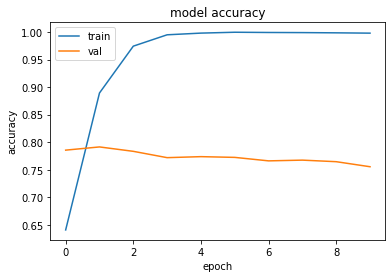

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
pred = model.predict(X_test2)

In [45]:
pred = pred.flatten()
print(pred.round(2))

[1.   1.   1.   ... 0.98 0.01 1.  ]


In [46]:
y_pred = np.where(pred > 0.5, 1, 0)

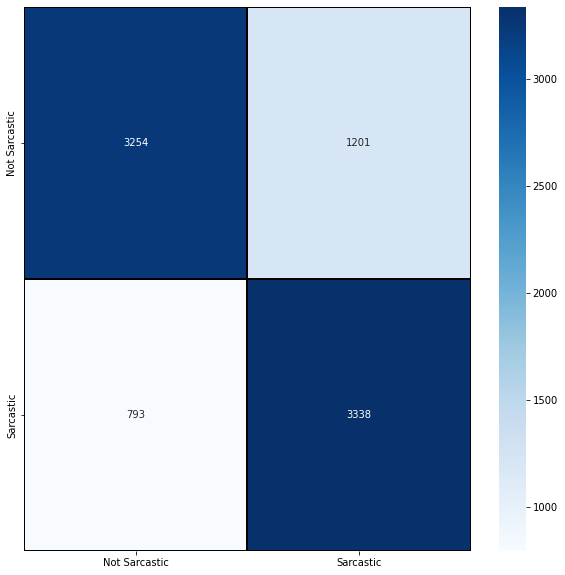

In [47]:
cm = confusion_matrix(y_test2, y_pred)


cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [48]:
cm

,Not Sarcastic,Sarcastic
Not Sarcastic,3254,1201
Sarcastic,793,3338


In [49]:
type(cm.iloc[0,0])

numpy.int64

In [50]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      4455
           1       0.74      0.81      0.77      4131

    accuracy                           0.77      8586
   macro avg       0.77      0.77      0.77      8586
weighted avg       0.77      0.77      0.77      8586



In [51]:
#let's try to detect sarcasm
headline = ['a nuclear explosion would be a disaster']
headline = tokenizer.texts_to_sequences(headline)
print(headline)
headline = pad_sequences(headline, maxlen=20, dtype='int32', value=0)
print(headline)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
print(np.argmax(sentiment))
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

[[498, 2957, 25, 1372]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  498 2957   25 1372]]
1/1 - 1s - 871ms/epoch - 871ms/step
0
Non-sarcastic


In [52]:
scores = {}
scores['w2v_model'] = round(accuracy_score(y_test2, y_pred), 3)

#Another method

In [53]:
df2 = pd.read_json('./SarcasmDetect.json', lines=True)
df2 = df2[df2['headline'] != '']
del df2['article_link'] 

df2['headline'] = df2['headline'].apply(lambda x: x.lower())
df2['headline'] = df2['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [54]:
df2['headline']=df2['headline'].apply(denoise_text)

In [55]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df2['headline'].values)
X2 = tokenizer.texts_to_sequences(df2['headline'].values)
X2 = pad_sequences(X2)
y2 = pd.get_dummies(df2['is_sarcastic']).values

#splitting the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.3, random_state=42)

In [56]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape, X_train3.shape, X_val3.shape, y_train3.shape, y_val3.shape

((14023, 35),
 (8586, 35),
 (14023, 2),
 (8586, 2),
 (14023, 35),
 (6010, 35),
 (14023, 2),
 (6010, 2))

In [57]:
embed_dim = 128
lstm_out = 196

model2 = Sequential()
model2.add(Embedding(max_fatures, embed_dim,input_length = X2.shape[1]))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='categorical_crossentropy', metrics = ['accuracy']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [58]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 35, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_2 (Dense)             (None, 256)               50432     
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 561,746
Trainable params: 561,746
Non-trainable params: 0
________________________________________________

In [59]:
es2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)


history2 = model2.fit(X_train3, y_train3, batch_size=32, shuffle=True, callbacks=[es2], validation_data=(X_val3, y_val3), epochs = 25)

Epoch 1/25
439/439 [==============================] - 70s 155ms/step - loss: 0.5745 - accuracy: 0.6938 - val_loss: 0.4886 - val_accuracy: 0.7451
Epoch 2/25
439/439 [==============================] - 67s 152ms/step - loss: 0.4475 - accuracy: 0.7860 - val_loss: 0.4901 - val_accuracy: 0.7592
Epoch 3/25
439/439 [==============================] - 86s 196ms/step - loss: 0.3842 - accuracy: 0.8198 - val_loss: 0.5212 - val_accuracy: 0.7481
Epoch 3: early stopping


In [60]:
print("Accuracy of the model on Training Data is - " , model2.evaluate(X_train3,y_train3)[1]*100)
print("Accuracy of the model on Testing Data is - " , model2.evaluate(X_test3,y_test3)[1]*100)

439/439 [==============================] - 5s 12ms/step - loss: 0.4059 - accuracy: 0.8101
Accuracy of the model on Training Data is -  81.00976943969727
269/269 [==============================] - 3s 12ms/step - loss: 0.4950 - accuracy: 0.7491
Accuracy of the model on Testing Data is -  74.91264939308167


In [61]:
score,acc = model2.evaluate(X_test3, y_test3, verbose = 2, batch_size = 32)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

269/269 - 3s - loss: 0.4950 - accuracy: 0.7491 - 3s/epoch - 10ms/step
score: 0.50
acc: 0.75


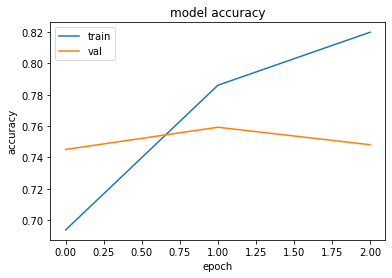

In [62]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
pred2 = model2.predict(X_test3)#.ravel()

In [64]:
pred2 = pred2.flatten()
print(pred2.round(2))

[0.68 0.32 0.22 ... 0.08 0.77 0.23]


In [65]:
y_pred2 = np.where(pred2 > 0.5, 1, 0)

In [66]:
y_pred2.shape

(17172,)

In [67]:
y_test3.ravel().shape

(17172,)

In [68]:
cm2 = confusion_matrix(y_test3.ravel(), y_pred2)

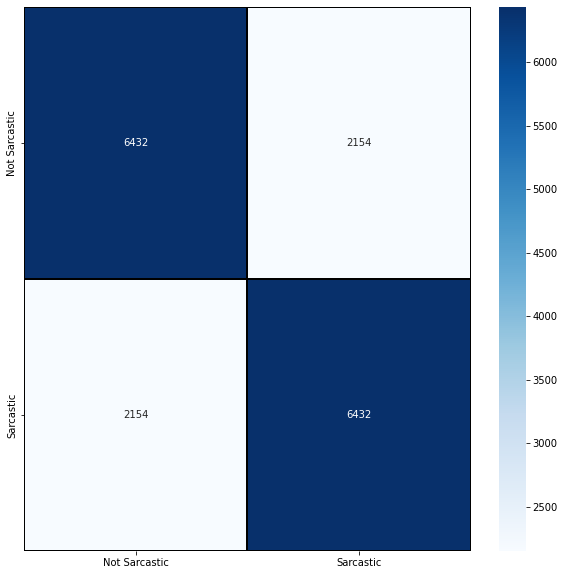

In [69]:
cm2 = pd.DataFrame(cm2 , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [70]:
print(classification_report(y_test3.ravel(), y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      8586
           1       0.75      0.75      0.75      8586

    accuracy                           0.75     17172
   macro avg       0.75      0.75      0.75     17172
weighted avg       0.75      0.75      0.75     17172



In [71]:
#let's try to detect sarcasm
headline = ['a nuclear explosion would be a disaster']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=35, dtype='int32', value=0)

sentiment = model2.predict(headline, batch_size=1, verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 234ms/epoch - 234ms/step
Non-sarcastic


In [72]:
scores['LSTM'] = round(accuracy_score(y_test3.ravel(), y_pred2), 3)

# FastText Embeddings + CNN

In [73]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

--2022-06-25 19:53:02--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828358084 (5.4G) [application/zip]
Saving to: ‘crawl-300d-2M-subword.zip’

crawl-300d-2M-subwo 100%[===================>]   5.43G  58.4MB/s    in 1m 43s  

2022-06-25 19:54:45 (53.8 MB/s) - ‘crawl-300d-2M-subword.zip’ saved [5828358084/5828358084]



In [74]:
!unzip crawl-300d-2M-subword.zip

Archive:  crawl-300d-2M-subword.zip
  inflating: crawl-300d-2M-subword.vec  
  inflating: crawl-300d-2M-subword.bin  


In [75]:
t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

In [76]:
print(max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), 
      min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), 
      t.word_index['<UNK>'])

('indulging', 20606) ('<PAD>', 0) 1


In [77]:
train_sequences = t.texts_to_sequences(X_train)
val_sequences = t.texts_to_sequences(X_val)
test_sequences = t.texts_to_sequences(X_test)

In [78]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=20607
Number of Documents=14023


In [79]:
MAX_SEQUENCE_LENGTH = 25

# pad dataset to a maximum review length in words
X_train_F = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_val_F = tf.keras.preprocessing.sequence.pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test_F = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train_F.shape, X_test_F.shape

((14023, 25), (8586, 25))

In [80]:
VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 300
EPOCHS=100
BATCH_SIZE=128

In [81]:
word2idx = t.word_index
FASTTEXT_INIT_EMBEDDINGS_FILE = '/content/crawl-300d-2M-subword.vec' #Insert your path to the file


def load_pretrained_embeddings(word_to_index, max_features, embedding_size, embedding_file_path):    
    
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    # def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
    
    embeddings_index = dict(get_coefs(*row.split(" ")) 
                                for row in open(embedding_file_path, encoding="utf8", errors='ignore') 
                                    if len(row)>100)

    all_embs = np.stack(embeddings_index.values())
    emb_mean, emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_to_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))
    
    for word, idx in word_to_index.items():
        if idx >= max_features: 
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [82]:
ft_embeddings = load_pretrained_embeddings(word_to_index=word2idx, 
                                           max_features=VOCAB_SIZE, 
                                           embedding_size=EMBED_SIZE, 
                                           embedding_file_path=FASTTEXT_INIT_EMBEDDINGS_FILE)
ft_embeddings.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(20607, 300)

In [83]:
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBED_SIZE,
                                    weights=[ft_embeddings],
                                    trainable=True,
                                    input_length=MAX_SEQUENCE_LENGTH))

model3.add(tf.keras.layers.Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model3.add(tf.keras.layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model3.add(tf.keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 300)           6182100   
                                                                 
 conv1d (Conv1D)             (None, 25, 256)           307456    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           131200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)            

In [85]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)

history3 = model3.fit(X_train_F, y_train, 
                      validation_data=(X_val_F, y_val),
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      shuffle=True,
                      callbacks=[es],
                      verbose=1)

Epoch 1/100
110/110 [==============================] - 11s 16ms/step - loss: 0.5084 - accuracy: 0.7350 - val_loss: 0.4033 - val_accuracy: 0.8171
Epoch 2/100
110/110 [==============================] - 1s 11ms/step - loss: 0.1932 - accuracy: 0.9260 - val_loss: 0.4761 - val_accuracy: 0.8075
Epoch 3/100
110/110 [==============================] - 1s 12ms/step - loss: 0.0426 - accuracy: 0.9850 - val_loss: 0.7507 - val_accuracy: 0.8115
Epoch 3: early stopping


In [86]:
print("Accuracy of the model on Training Data is - " , model3.evaluate(X_train_F, y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model3.evaluate(X_test_F, y_test)[1]*100)

439/439 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9278
Accuracy of the model on Training Data is -  92.77615547180176
269/269 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8184
Accuracy of the model on Testing Data is -  81.84253573417664


In [87]:
score,acc = model3.evaluate(X_test_F, y_test, verbose = 2, batch_size = BATCH_SIZE)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

68/68 - 0s - loss: 0.4000 - accuracy: 0.8184 - 203ms/epoch - 3ms/step
score: 0.40
acc: 0.82


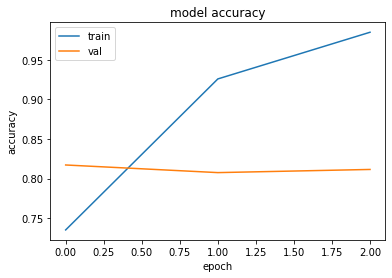

In [88]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [89]:
pred3 = model3.predict(X_test_F)

In [90]:
pred3 = pred3.flatten()
print(pred3.round(2))

[0.35 0.91 1.   ... 0.27 0.28 0.97]


In [91]:
y_pred3 = np.where(pred3 > 0.5, 1, 0)

In [92]:
cm3 = confusion_matrix(y_test, y_pred3)

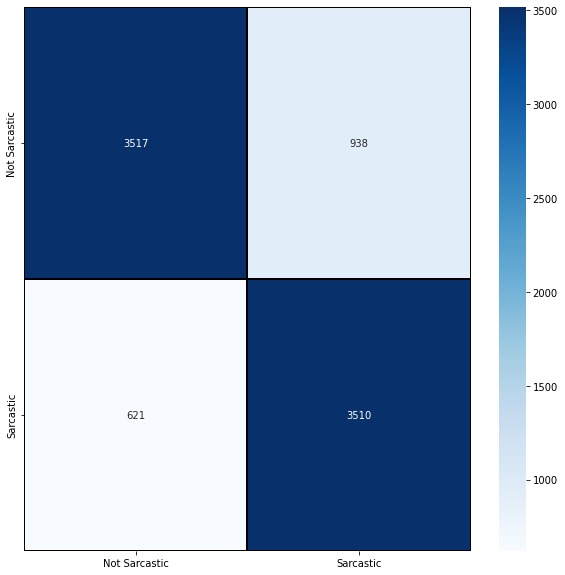

In [93]:
cm3 = pd.DataFrame(cm3 , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm3,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [94]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4455
           1       0.79      0.85      0.82      4131

    accuracy                           0.82      8586
   macro avg       0.82      0.82      0.82      8586
weighted avg       0.82      0.82      0.82      8586



In [95]:
#let's try to detect sarcasm
headline = ['The United states declared war on itself']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=25, dtype='int32', value=0)

sentiment = model3.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 128ms/epoch - 128ms/step
Non-sarcastic


In [96]:
scores['FastText'] = round(accuracy_score(y_test, y_pred3), 3)

# DistilBERT

In [97]:
!sudo pip3 install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import tqdm

In [99]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [100]:
def create_bert_input_features(tokenizer, docs, max_seq_length):
    
    all_ids, all_masks = [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):
        
        tokens = tokenizer.tokenize(doc)
        
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)
        
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
            
        all_ids.append(ids)
        all_masks.append(masks)
        
    encoded = np.array([all_ids, all_masks])
    
    return encoded

In [101]:
MAX_SEQ_LENGTH = 25

inp_id = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LENGTH,), dtype='int32', name="bert_input_masks")
inputs = [inp_id, inp_mask]

hidden_state = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')(inputs)[0]
pooled_output = hidden_state[:, 0]    

dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output)
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)

output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)


model4 = tf.keras.Model(inputs=inputs, outputs=output)


model4.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5, 
              epsilon=1e-08), 
              loss='binary_crossentropy', metrics=['accuracy'])


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [102]:
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 25)]         0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 25)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['bert_input_ids[0][0]',         
 BertModel)                     ast_hidden_state=(N               'bert_input_masks[0][0]']       
                                one, 25, 768),                                                    
                                 hidden_states=None                                           

In [103]:
train_features_ids, train_features_masks = create_bert_input_features(tokenizer, X_train, 
                                                                      max_seq_length=MAX_SEQ_LENGTH)
val_features_ids, val_features_masks = create_bert_input_features(tokenizer, X_val, 
                                                                  max_seq_length=MAX_SEQ_LENGTH)


print('Train Features:', train_features_ids.shape, train_features_masks.shape)
print('Val Features:', val_features_ids.shape, val_features_masks.shape)

Converting docs to features: 100%|██████████| 6010/6010 [00:01<00:00, 3469.26it/s]


Train Features: (14023, 25) (14023, 25)
Val Features: (6010, 25) (6010, 25)


In [104]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=1,
                                      restore_best_weights=True,
                                      verbose=1)

history4 = model4.fit([train_features_ids, 
                      train_features_masks], y_train, 
                      validation_data=([val_features_ids, 
                      val_features_masks], y_val),
                      epochs=3, 
                      batch_size=20, 
                      shuffle=True,
                      callbacks=[es],
                      verbose=1)

Epoch 1/3
702/702 [==============================] - 68s 86ms/step - loss: 0.4801 - accuracy: 0.7653 - val_loss: 0.3755 - val_accuracy: 0.8303
Epoch 2/3
702/702 [==============================] - 60s 85ms/step - loss: 0.2681 - accuracy: 0.8915 - val_loss: 0.4069 - val_accuracy: 0.8429
Epoch 2: early stopping


In [105]:
test_features_ids, test_features_masks = create_bert_input_features(tokenizer, X_test, max_seq_length=MAX_SEQ_LENGTH)
print('Test Features:', test_features_ids.shape, test_features_masks.shape)

Converting docs to features: 100%|██████████| 8586/8586 [00:02<00:00, 3516.07it/s]


Test Features: (8586, 25) (8586, 25)


In [109]:
y_pred4 = [1 if pr > 0.5 else 0 
                   for pr in model4.predict([test_features_ids, 
                                            test_features_masks], batch_size=200, verbose=0).ravel()]

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred4)*100))
print(classification_report(y_test, y_pred4))
pd.DataFrame(confusion_matrix(y_test, y_pred4))

Accuracy: 83.73%
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      4455
           1       0.80      0.87      0.84      4131

    accuracy                           0.84      8586
   macro avg       0.84      0.84      0.84      8586
weighted avg       0.84      0.84      0.84      8586



,0,1
0,3579,876
1,521,3610


In [110]:
scores['DistilBERT'] = round(accuracy_score(y_test, y_pred4), 3)

# End

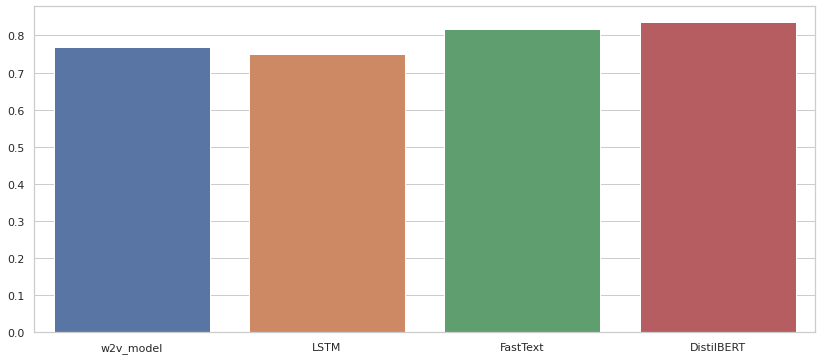

In [116]:
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x=list(scores.keys()),
            y=list(scores.values()));